# Primer proyecto

### Integrantes del equipo

Rodrigo Barrera 181935

Sebastián Duolong 188172

Bruno Vitte 179524

Bernando (Se dio de baja)

## Introducción

Como proyecto elegimos resolver el puzzle del tres por tres.

El objetivo del problema es partiendo de un tablero inicial con las fichas desordenadas alcanzar un tablero en el que todas las fichas estén ordenadas en orden creciente, dejando el hueco en el centro . El número total de estados o tableros posibles que se pueden generar en el juego del puzzle es 9! = 362,880 estados. 

Es decir, lo que buscamos es que termine de la siguiente manera:
![puzzle final](puzzle_final.png)

## Desarrollo

Durante el desarrollo de este proyecto empleamos el método de A* para resoolver el reto. Como era de esperar, nos encontramos con varias dificultades para el desarrollo del proyecto.
Algunas de las cosas que pasamos fue que:
* En unos casos el tiempo de ejecución era demasiado, pero con poco uso de nodos y de espacio en pila.
* En otro intento, la ejecución era más rápida, pero con demasiados nodos y en algunos casos se llenaba la pila de ejecución.

En los últimos intentos que ya no tardaban tanto solo nos preocupamos porque fuera más eficiente, por lo que optamos por agregar una cola de prioridad y una tabla hash, lo que nos ayudo a mejorar los tiempos bastante.

### ¿Cómo saber si el estado dado se puede resolver?

![Puzzle soluble](puzzle_soluble.png)

No es posible resolver una instancia de 8 rompecabezas si el número de inversiones es impar en el estado de entrada. En los ejemplos dados en la figura anterior, el primer ejemplo tiene 10 inversiones, por lo tanto, tiene solución. El segundo ejemplo tiene 11 inversiones, por lo tanto no tiene solución.

Finalmente nuestro código quedó de la siguiente forma:
***
~~~
(setq estadoFinal '(A 1 2 3 8 0 4 7 6 5 5))
;(setq estadoFinal '(A 1 2 3 4 5 6 7 8 0 9))

;(setq estadoPrueba '(A 1 3 4 8 6 2 7 0 5 8));en 5 nodos
;(setq estadoPrueba '(A 2 8 1 0 4 3 7 6 5 4));27 nodos
;(setq estadoPrueba '(A 2 8 1 4 6 3 0 7 5 7)); 87 nodos
;(setq estadoPrueba '(A 5 6 7 4 0 8 3 2 1 5)); nodos

;(setq estadoPrueba '(A 2 8 3 1 0 4 7 6 5 5)); 5 nodos
;(setq estadoPrueba '(A 2 8 3 1 6 4 7 0 5 8)) ;6 nodos
(setq estadoPrueba '(A 8 3 5 2 0 6 7 1 4 5)) ; 348 nodos
;(setq estadoPrueba '(A 1 3 4 8 0 5 7 2 6 5)) ; 12 nodos
;(setq estadoPrueba '(A 1 3 4 8 6 2 0 7 5 7)) ; 6 nodos
;(setq estadoPrueba '(A 3 6 4 0 1 2 8 7 5 4)) ; 45 nodos
;(setq estadoPrueba '(A 4 2 5 0 1 3 7 6 8 4)) ;2493 nodos No se soluciona
;(setq estadoPrueba (list 'A '0 '1 '3 '4 '2 '5 '7 '8 '6 '1)); Llegó a 75mil nodos y no
;(setq estadoPrueba '(A 2 1 3 8 0 4 6 7 5 5)); 2187 nodos
;(setq estadoPrueba '(A 5 6 7 4 0 8 3 2 1 5)); Casi 31mil nodos y no
;Nodo es (A p1 p2 p3 p4 p5 p6 p7 p8 p9 posV)


(defun funcionHamming (estadoActual)
	(setq costo 0) ;Creo la variable costo
    (dotimes (i 9) ;Voy a iterar sobre la lista completa
        (if (not (equal (nth i estadoActual) 0)) ;Si la posición actual no es el vacío
            (cond ((equal (nth i estadoActual) (nth i estadoFinal)) ;Comparo las posiciones
                    NIL) ;Si son iguales no hago nada
                  (T (incf costo)) ;Si son diferentes, aumento el costo
            ) ;Cierro el cond
        ) ;Cierro el if
    ) ;Ciero el dotimes
    (return-from funcionHamming costo) ;Regreso
) ;Acaba la función

;;Defino la estructura con la cual guardo los estados (Es como una clase)
(defstruct nodo
	estado ;Contiene la lista que representa a la matriz (como se ve el tablero)
	gValor ;Es donde guardo el resultado de g(n), nivel
	fValor ;Es donde guardo el resultado de f(n)
	padre ;El nodo padre
	operador

)

(defun initNodo(estadoTemp) ;Inicializo un nodo con sus valores
	(setq nuevoNodo (make-nodo :estado estadoTemp
		:gValor 0 ;Inicia con nivel 0
		:fValor 9999 ;Inicio como muy costoso, porque no sé que tanto valga
		:padre NIL ;Inicia huérfano
		:operador NIL))
	(return-from initNodo nuevoNodo)
)

(defun hacerCambio(estado nuevaPos viejaPos);Con esto puedo mover el 0

	(setf copia (copy-list estado)) ;Copio el nodo que pase
	(rotatef (nth nuevaPos copia) (nth viejaPos copia)) ;Intercambio la posición del 0
	(fill copia nuevaPos :start 10 :end 11) ;modifico en la copia la nueva posición del 0
	(return-from hacerCambio copia) ;Regreso la copia

)


(defun generar_sucesores (nodoActual)
	(setq estado (nodo-estado nodoActual))
	(setq operadorPadre (nodo-operador nodoActual))
	;Los nuevos indices
	;(setq posVacio (car (reverse estado)))
    (setq posVacio (car (last estado)))
	(setq arriba (- posVacio 3))
	(setq abajo (+ posVacio 3))
	(setf izquierda (- posVacio 1))
	(setf derecha (+ posVacio 1))
	(setq gValorPadre (nodo-gValor nodoActual))
	
	(if (and (> arriba 0) (not(eq operadorPadre 'abajo)));Si me puedo mover hacia arriba
		(progn 
            (setq hijoArriba (hacerCambio estado arriba posVacio))
            (if 
                (revisaPosibilididad hijoArriba cerrado)
                (progn 
                    (setq nodoArriba (initNodo hijoArriba))
			        (setf (nodo-gValor nodoArriba) (+ 1 gValorPadre))
			        (setf (nodo-fValor nodoArriba) (+ (nodo-gValor nodoArriba) (funcionHamming hijoArriba)))
			        (setf (nodo-padre nodoArriba) nodoActual)
			        (setf (nodo-operador nodoArriba) 'arriba)
                    ;(insertarAbierto nodoArriba)
                    (enqueue abierto nodoArriba (nodo-fValor nodoArriba)) 
                    ;(setf abierto (push nodoArriba abierto))
                    
                    
                )
            )
		)
	)
    
	(if (and (< abajo 10) (not(eq operadorPadre 'arriba)));Si me puedo mover hacia abajo
		(progn 
            (setq hijoAbajo (hacerCambio estado abajo posVacio))
            (if 
                (revisaPosibilididad hijoAbajo cerrado)
                (progn 
                    (setq nodoAbajo (initNodo hijoAbajo))
			        (setf (nodo-gValor nodoAbajo) (+ 1 gValorPadre))
			        (setf (nodo-fValor nodoAbajo) (+ (nodo-gValor nodoAbajo) (funcionHamming hijoAbajo)))
			        (setf (nodo-padre nodoAbajo) nodoActual)
			        (setf (nodo-operador nodoAbajo) 'abajo)
                    ;(insertarAbierto nodoAbajo)
                    (enqueue abierto nodoAbajo (nodo-fValor nodoAbajo)) 
                    ;(setf abierto (push nodoAbajo abierto))
                    
                )
            )
		)
	)
	(if (and (/= (mod izquierda 3) 0) (not(eq operadorPadre 'der)));Si me puedo mover hacia la izquierda
		(progn 
            (setq hijoIzq (hacerCambio estado izquierda posVacio))
            (if 
                (revisaPosibilididad hijoIzq cerrado)
                (progn 
                    (setq nodoIzq (initNodo hijoIzq))
			        (setf (nodo-gValor nodoIzq) (+ 1 gValorPadre))
                    (setf (nodo-fValor nodoIzq) (+ (nodo-gValor nodoIzq) (funcionHamming hijoIzq)))
                    (setf (nodo-padre nodoIzq) nodoActual)
			        (setf (nodo-operador nodoIzq) 'Izq)
                    ;(insertarAbierto nodoIzq)
                    (enqueue abierto nodoIzq (nodo-fValor nodoIzq)) 
                    ;(setf abierto (push nodoIzq abierto))
                    
                )
            )
		)
	)
	(if (and (/= (mod posVacio 3) 0) (not(eq operadorPadre 'izq))) ;Si me puedo mover hacia la derecha
		(progn 
            (setq hijoDer (hacerCambio estado derecha posVacio))

            (if 
                (revisaPosibilididad hijoDer cerrado)
                (progn 
                    (setq nodoDer (initNodo hijoDer))
			        (setf (nodo-gValor nodoDer) (+ 1 gValorPadre))
			        (setf (nodo-fValor nodoDer) (+ (nodo-gValor nodoDer) (funcionHamming hijoDer)))
			        (setf (nodo-padre nodoDer) nodoActual)
			        (setf (nodo-operador nodoDer) 'Der)
                    ;(insertarAbierto nodoDer)
                    (enqueue abierto nodoDer (nodo-fValor nodoDer)) 
                    ;(setf abierto (push nodoDer abierto))
                    
                )
            )
		)
	)
)



(defun revisaPosibilididad (estado nodos)
    (if (gethash estado nodos)
    (return-from revisaPosibilididad nil)
    (return-from revisaPosibilididad t))
)

(defun mejorOpcion (abierta) ;Me va a regresar el mejor estado de entre los de abierto
	(setf min (initNodo (nodo-estado (nth 0 abierto)))) ;Obtengo el estado del nodo 
	(setf (nodo-fValor min) 9999) ;Pongo el minimo valor como algo muy alto, porque mejor es nada
	(block abierto_loop ;Un block evalua una serie de formas y regresa el resultado de la forma que de return 
		(loop for n in abierto do ;Itero sobre cada elemento en abierto, e es un estado
			(if(< (nodo-fValor n) (nodo-fValor min)) ;Voy comparando el valorF del estado, con el minimo que tengo
					(setf min (copy-nodo n)) () ) ;Si es menor, min ahora es e 
                    ;(if (prueba) (casoTrue) (casoFalse))
		)
		(return-from abierto_loop min) ;Regreso el min
	)
)

(defun insertarAbierto (nodo)
    (setf abierto (push nodo abierto))
)



(defun eliminarElemento(e nlista);Quito el elemento de la lista, le paso el nodo completo
	(setq m_list nil) ;Inicio una lista vacía
	(loop for nodo in nlista do ;Itero sobre cada nodo de nlista
		(progn ;Sirve pare ejecutar una serie de formas
			(if(not(equal (nodo-estado nodo) (nodo-estado e))) ;Si los estados no son lo  
				(
					push nodo m_list ;agrego el nodo a la lista
				)
			)
		)
		collect m_list ;voy guardando en m_list lo que voy agregando
	)
	(return-from eliminarElemento m_list) ;regreso la lista
)


(defun a_Estrella (nodoInicial)
	;(if (not(sePuede nodoInicial estadoMeta))
	;	(return-from a_Estrella 'No_se_puede_resolver)
	;)
	(if (not (tiene_solucion nodoInicial estadoMeta))
		(progn
			(return-from a_Estrella "Irresoluble")
		)
		
	)
	(loop while (and (/= (QUEUE-SIZE abierto) 0) (< nodosExpandidos 475000))do;Mientras abierto siga con algún elemento
		(progn 
			;(setq actual (mejorOpcion abierto));Obtengo la mejor opción basada en f
            (setq actual (dequeue abierto) )
			(if (equal (nodo-estado actual) estadoMeta) ;Checo si es la meta
				(return-from a_Estrella (imprimeRuta actual nodosExpandidos)) ;Regreso la impresion
			)
			( if (< (nodo-gValor actual) 50)
            (progn 
            (setf hijos (generar_sucesores actual));Creo la lista de hijos
            (setf (gethash (nodo-estado actual) cerrado) actual)
            (incf nodosExpandidos)
            ;(print (nodo-gValor actual))
			;(print nodosExpandidos)
            ))

		)
	)
	(return-from a_Estrella 'fracaso) ;Esto es si nunca hubo resultado
)

(defun imprimeRuta(actual nodosExpandidos)
	(setf ruta nil)
	(loop while(not(eq actual NIL)) do
		(progn
			(if (not (null (nodo-operador actual)))
                (push (nodo-operador actual) ruta)
            )
            
			;(push (nodo-estado actual) ruta)
			(setf actual (nodo-padre actual))
		)
	)
	(push nodosExpandidos ruta)
	;(reverse ruta)
	ruta
)

(defun solver (nodoInicial)
    (setq nodosExpandidos 0)
    (setq estadoMeta '(A 1 2 3 8 0 4 7 6 5 5))
	;(setq estadoMeta '(A 1 2 3 4 5 6 7 8 0 9))
    (setq ruta (a_Estrella nodoInicial))
    ruta
)

(defun tiene_solucion (inicio meta)
	;;funcion que revisa el numero de inversiones en los estados inicial y final para ver si el puzzle es resoluble
	(setf lista_pares_inicial nil)
	(setf lista_pares_meta nil)
	(dotimes(cont 9);;inversiones del estado inicial
		(progn
			(if(not(eq (nth cont inicio) 0))
				(progn
					(setf cont1 (+ 1 cont))
					(loop while(<= cont1 8) do
						(progn
							(if(not(eq(nth cont1 inicio) 0))
								(progn
									(push (list (nth cont inicio) 
													(nth cont1 inicio)) 
														lista_pares_inicial)
								)
							)
							(setf cont1 (+ 1 cont1))
						)
					)

				)
			)
		)
	)
	(dotimes(cont 9);;inversiones del estado meta
		(progn
			(if(not(eq (nth cont meta) 0))
				(progn
					(setf cont1 (+ 1 cont))
					(loop while(<= cont1 8) do
						(progn
							(if(not(eq(nth cont1 meta) 0))
								(progn
									(push (list (nth cont meta) 
													(nth cont1 meta)) 
														lista_pares_meta)
								)
							)
							(setf cont1 (+ 1 cont1))
						)
					)
				)
			)
		)
	)
	(setf en_comun 0);;compara inversiones de los dos estados
	(loop for x in lista_pares_inicial do

		(loop for y in lista_pares_meta do
			(progn
				(if(and (eq (first x) (first y)) (eq (second x)(second y)) )
					(setf en_comun (+ 1 en_comun))
				)
			)
		)
	)
	(setf no_inversiones 0)	
	
	(setf no_inversiones (- (list-length lista_pares_inicial) en_comun))
	
	(if (evenp no_inversiones ) (return-from tiene_solucion T);;si es par el num de inversiones, resuelve, si no no
						(return-from tiene_solucion NIL))
)
;;=====================================================================
(load 'Heaps.lisp)
(defvar nodoInicial (initNodo estadoPrueba))
(defvar cerrado NIL)
;(setq table (make-hash-table :test 'equal))
(defparameter abierto (make-instance 'priority-queue))
(defparameter cerrado (make-hash-table :test 'equal))
(enqueue abierto nodoInicial 0) 
;(print (dequeue abierto)) ;=> 'test
(print (solver estadoPrueba))

~~~
***

### Visualización

Finalmente para poder visualizar este proyecto elegimos usar un jupyter notebook con python para poder preparar algunos casos prueba y poder ver los movimientos del puzzle con mathplotlib de python.


Tiempo en resolver el puzzle: 0.4352562427520752  segundos
Resuelto en: 14 movimientos
[8 3 5]
[2 1 6]
[7 0 4]


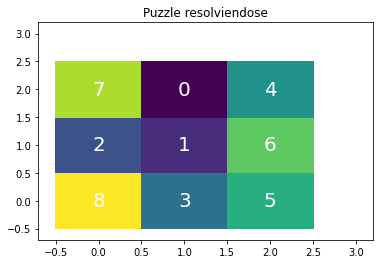

[8 3 5]
[2 1 6]
[7 4 0]


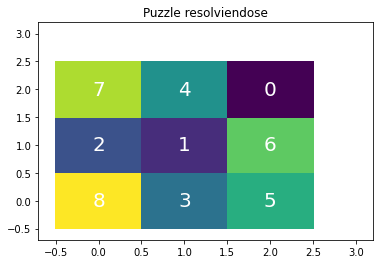

[8 3 5]
[2 1 0]
[7 4 6]


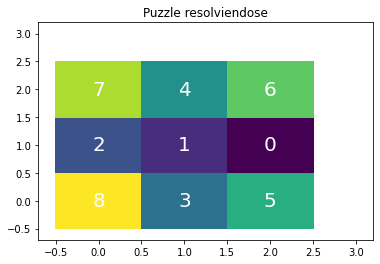

[8 3 0]
[2 1 5]
[7 4 6]


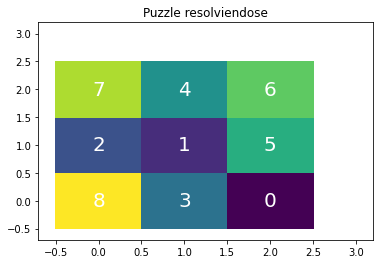

[8 0 3]
[2 1 5]
[7 4 6]


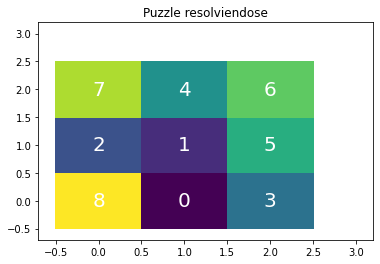

[8 1 3]
[2 0 5]
[7 4 6]


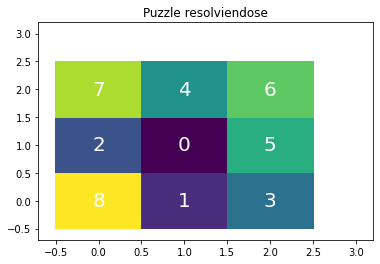

[8 1 3]
[2 4 5]
[7 0 6]


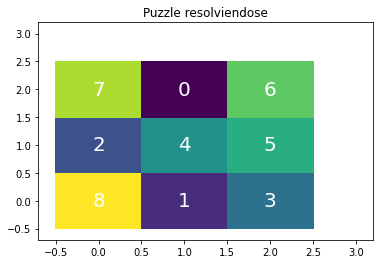

[8 1 3]
[2 4 5]
[7 6 0]


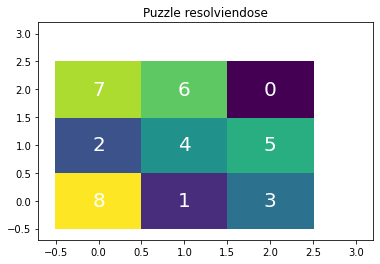

[8 1 3]
[2 4 0]
[7 6 5]


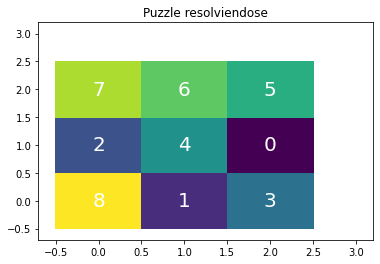

[8 1 3]
[2 0 4]
[7 6 5]


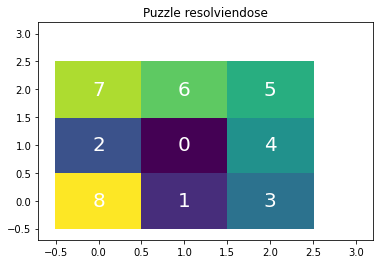

[8 1 3]
[0 2 4]
[7 6 5]


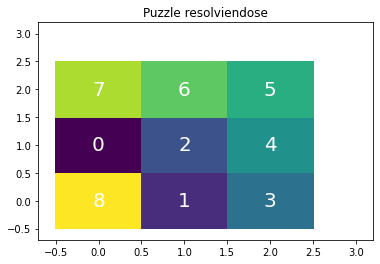

[0 1 3]
[8 2 4]
[7 6 5]


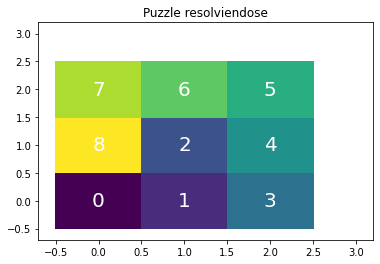

[1 0 3]
[8 2 4]
[7 6 5]


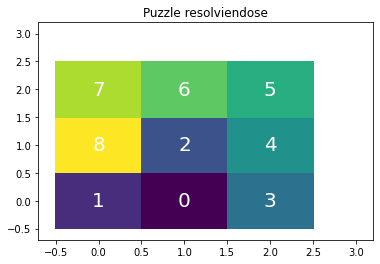

[1 2 3]
[8 0 4]
[7 6 5]


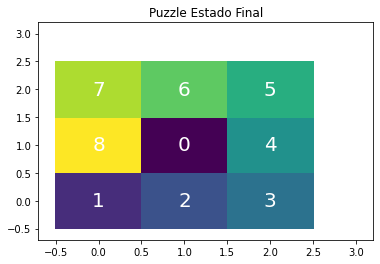

In [1]:
%matplotlib inline  
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import subprocess
import time



def _annotate(ax, x, y, title):
    # this all gets repeated below:
    X, Y = np.meshgrid(x, y)
    #ax.plot(X.flat, Y.flat, 'o', color='m')
    ax.set_xlim(-0.7, 3.2)
    ax.set_ylim(-0.7, 3.2)
    ax.set_title(title)

nrows = 3
ncols = 3

#z = [[2, 8, 3], [1, 0, 4], [7, 6, 5]]; posI = 1; posJ = 1
#z = [[2, 8, 3], [1, 6, 4], [7, 0, 5]]; posI = 2; posJ = 1
z = [[8, 3, 5], [2, 0, 6], [7, 1, 4]]; posI = 1; posJ = 1
#z = [[1, 3, 4], [8, 0, 5], [7, 2, 6]]; posI = 1; posJ = 1
#z = [[1, 3, 4], [8, 6, 2], [0, 7, 5]]; posI = 2; posJ = 0
#z = [[3, 6, 4], [0, 1, 2], [8, 7, 5]]; posI = 1; posJ = 0
#z = [[4, 2, 5], [0, 1, 3], [7, 6, 8]]; posI = 1; posJ = 0
#z = [[2, 1, 3], [8, 0, 4], [6, 7, 5]]; posI = 1; posJ = 1

x = np.arange(ncols)
y = np.arange(nrows)
cmd = "clisp A-Star_rapido.lisp"
time_ = time.time()
temp = str(subprocess.check_output(cmd, shell=True))
t = time.time()
timeF = t - time_

temp = temp.replace('(', '')
temp = temp.replace(')', '')

temp = temp.split()
print()
if temp[0] == "b'\\r\\n\"Irresoluble\"":
    print("No se puede resolver")
else:
    print("Tiempo en resolver el puzzle:", timeF, " segundos")
    print("Resuelto en:", len(temp) - 2, "movimientos")
    message = ""
    vPosI, vPosJ = 0, 0
    for i in range(len(temp) - 1):
        if i == 0:
            message = "Puzzle Estado inicial"
        else:
            message = "Puzzle resolviendose"
            if temp[i] == 'ARRIBA':
                vPosI = posI
                posI = vPosI - 1
                aux = z[posI][posJ]
                z[vPosI][posJ] = aux
                z[posI][posJ] = 0 
            elif temp[i] == 'ABAJO':
                vPosI = posI
                posI = vPosI + 1
                aux = z[posI][posJ]
                z[vPosI][posJ] = aux
                z[posI][posJ] = 0 
            elif temp[i] == 'IZQ':
                vPosJ = posJ
                posJ = vPosJ - 1
                aux = z[posI][posJ]
                z[posI][vPosJ] = aux
                z[posI][posJ] = 0 
            elif temp[i] == 'DER':
                vPosJ = posJ
                posJ = vPosJ + 1
                aux = z[posI][posJ]
                z[posI][vPosJ] = aux
                z[posI][posJ] = 0 
            if i == len(temp) - 2:
                message = "Puzzle Estado Final"

            Z = np.array(z).reshape(nrows, ncols)
            for j in range(3):
                print(Z[j])
            fig, ax = plt.subplots()
            ax.pcolormesh(x, y, Z, shading='auto', vmin=Z.min(), vmax=Z.max())
            for j in range(3):
                for k in range(3):
                    ax.text(k, j, z[j][k], ha="center",va="center", size=20,color="w")

            _annotate(ax, x, y, message)
            plt.plot()
            plt.show()
            time.sleep(3)
